# Question
Implement Gaussian Process for the dataset about energy consumption.

---

## 1. Dataset

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("./EnergyConsumptionData.xlsx" ,sheet_name="Sheet1", header = None)
X = data.iloc[:,0].values
y = data.iloc[:,1].values
data.head()

,0,1
0,1,0.20651
1,2,0.48744
2,3,0.22663
3,4,0.68297
4,5,0.76730


In [3]:
len(data)

500

## 2. Question a
Explain briefly the Gaussian Process algorithm in general and how it is used for modelling this data.

---

Gaussian Process (GP) is a distribution over functions t(x) where the
set of values of t(x) jointly have a Gaussian distribution. The
distribution is defined by a mean function and a covariance function.
$$f(x) \approx GP(m(x), K(x,x'))$$ where $K(x,x')$ is the kernel
function represents the covariance of t(x) evaluated at any two values x
and x’.  
Applying GP to the data set is applying GP to a regression problem where
we have to make a prediction of y based on the x value. If we have new
input value $x_{N+1}$, we want to make a prediction for $y_{N+1}$ by
$t(x_{N+1})$. This can be done by calculate the posterior distribution
$p(y_{N+1}|x_N, y_N, x_{N+1})$

## 3. Question b
Plot the data and identify its main properties (e.g., frequency, amplitude)

---

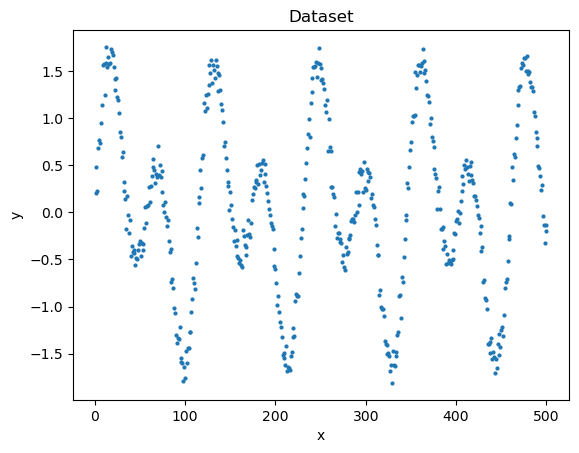

In [5]:
plt.scatter(X,y,s=4)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


The minimum and maximum values of the y-variable are -1.8111 and 1.7577,
respectively. The dataset exhibits a repeating pattern, which can be
observed in the figure. The data set reaches the minimum value of y 4
times at intervals of x that include \[100,200\], \[200,300\],
\[300,400\], \[400,500\]. To identify the pattern, I extract the minimum
data points in each interval, which are (100, -1.7618), (213,-1.6874),
(329, -1.8111), (443,-1.7050). These points set the boundaries of
recurring patterns in the data set.

Each pattern starts from the minimum y-value and reaches the maximum
y-value, and then descends to a local minimum of around -0.5, ascending
again to a local maximum value of roughly 0.5, and finally decreases to
reach the global minimum y-value again.  

The amplitude of this pattern is the vertical distance of the maximum
and minimum points, which equals 3.5688.  

The length of each pattern is the horizontal distance between the
starting points of two consecutive patterns, which equals 113. Thus, the
repeating signal has a frequency of 1/113 units of x.  

Finally, the figure shows that the pattern repeats 5 times in the
dataset.

## 4. Question c
Use the Gaussian process method to model using the kernel: 
    $$C(x,x';\Theta) = \theta exp \left[ -\frac{1}{2} \sum_{i=1}^2 
 \left (\frac{sin(\frac{\pi}{\lambda_i}(x-x'))}{r_i} \right )^2 \right]$$
 with the parameters $\theta = 0.7369$, $\lambda_1 = \lambda_2 = −0.2278$, $r_1 = 0.2802$ and $r_2 = 0.2898$. Data {y} is corrupted by noise drawn
from the normal distribution of zero mean and unit variance multiplied by 0.1.

 ---



* The role of each one of the coefficients:

$\theta$ is the magnitude of the formula. It represents how much
vertical function can span.  
The formula inside the exponential equation is controlled by parameters
$r_i$ and $\lambda_i$. $r_i$ represents how sensitive the covariance is
to change with respect to the sin function in the numerator. A very
large $r_i$ value makes the value inside exponential close to zero. In
that case, the kernel value is invariant to the change in x. $\lambda_i$
controls the distance between pattern repetitions. Increasing
$\lambda_i$ will increase the length of each pattern.

* Gaussian process:

Consider $t_n = t(x_n)$, the formula of targeted value is:
$$y_n = t_n + \epsilon_n$$ where $\epsilon_n$ is Gaussian noise
describing how noisy the fit is to the actual observation, the Gaussian
distribution of noise is $\mathcal{N}(0, \sigma_{\epsilon}^2)$.  
This noise can be added to the kernel function:
$$p(t(x)|\Theta) = GP(m(x), C(x,x'))$$ where
$C = K(x,x') + I\sigma_{\epsilon}^2$  
To make predictions of target value $y_{N+1}$ for new input $x_{N+1}$.
The joint distribution over $y_1,...,y_N,y_{N+1}$ is:
$$p(y_{N+1}) = \mathcal{N}(y_{N+1}| m(x), C_{N+1})$$ where
$C_{N+1}$ is an (N+1) x (N+1) covariance matrix has the form:
$$C_{N+1} = 
\begin{pmatrix}
    C_N & k\\
    k^T & c
\end{pmatrix}$$ where $k = K(x_n,x_{N+1})$ for n = 1,2,...,N;
$c = K(x_{N+1}, x_{N+1})$  
The conditional distribution $p(y_{N+1}|y)$ is the Gaussian with
mean is: $$m(x_{N+1}) = k^{T}C_N^{-1}y$$

* The kernel equals:

$$C(x,x';\Theta) = \theta exp \left[ -\frac{1}{2} 
 \left (\frac{sin(\frac{\pi}{\lambda_1}(x-x'))}{r_1} \right )^2 \right] exp \left[ -\frac{1}{2}
 \left (\frac{sin(\frac{\pi}{\lambda_2}(x-x'))}{r_2} \right )^2 \right]
$$
each exponential equation is a Exp-Sine-Squared kernel. 

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import ConstantKernel

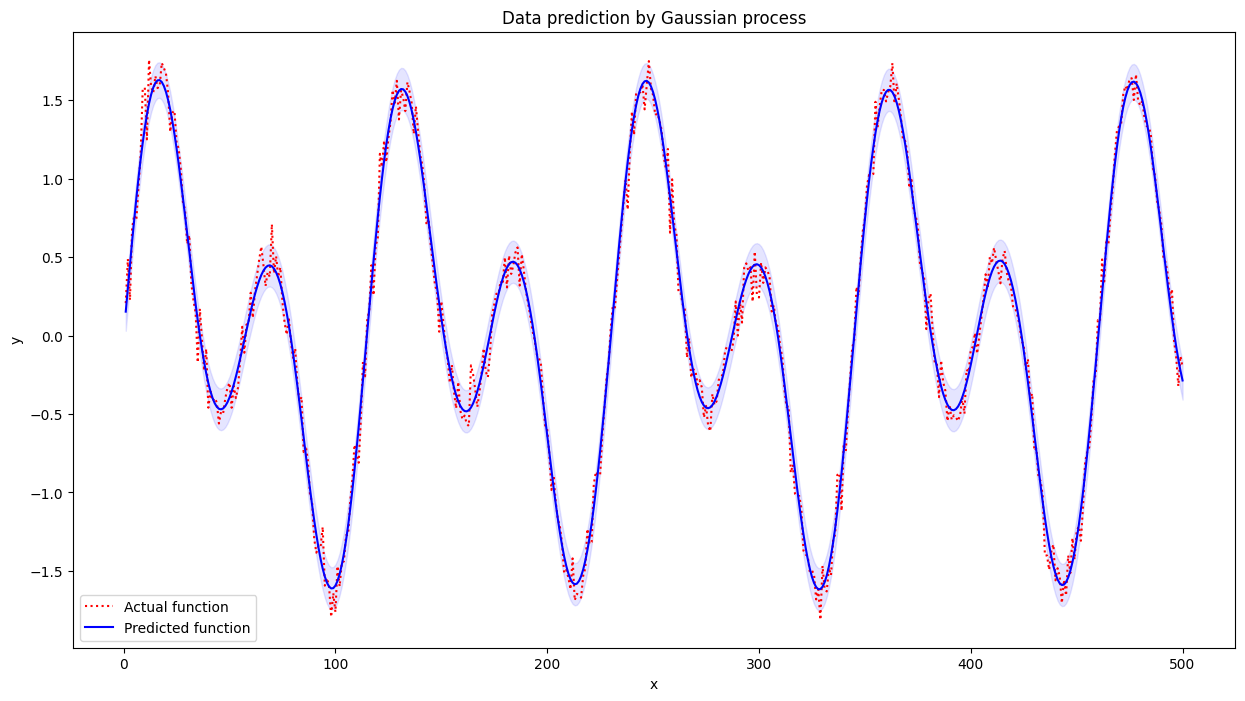

In [7]:
kernel_2 = ConstantKernel(0.7369) *  ExpSineSquared(length_scale=2*0.2802, periodicity=0.2278 )* ExpSineSquared(length_scale=2*0.2898, periodicity=0.2278)
model = GaussianProcessRegressor(kernel=kernel_2, alpha = 0.1, random_state=0).fit(X.reshape(-1,1), y.reshape(-1,1))

## Generate some test data
X_test = X
# Calculate the mean function at the test points
y_mean, sigma = model.predict(X.reshape(-1,1), return_std=True)

## Plot the results
plt.subplots(figsize=(15, 8))
plt.plot(X, y, 'r:', label='Actual function')
plt.plot(X_test, y_mean, 'b-', label='Predicted function')
plt.fill_between(X_test.ravel(), y_mean.ravel() - 2 * sigma, y_mean.ravel() + 2 * sigma, alpha=0.1, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data prediction by Gaussian process')
plt.legend()
plt.show()

In [ ]:
#print(model.get_params())
dict_model = {'alpha': 0.1,
        'copy_X_train': True,
        'kernel__k1': 0.858**2 * ExpSineSquared(length_scale=0.56, periodicity=0.228),
        'kernel__k2': ExpSineSquared(length_scale=0.58, periodicity=0.228),
        'kernel__k1__k1': 0.858**2,
        'kernel__k1__k2': ExpSineSquared(length_scale=0.56, periodicity=0.228),
        'kernel__k1__k1__constant_value': 0.7369,
        'kernel__k1__k1__constant_value_bounds': (1e-05, 100000.0),
        'kernel__k1__k2__length_scale': 0.5604,
        'kernel__k1__k2__periodicity': 0.2278,
        'kernel__k1__k2__length_scale_bounds': (1e-05, 100000.0),
        'kernel__k1__k2__periodicity_bounds': (1e-05, 100000.0),
        'kernel__k2__length_scale': 0.5796,
        'kernel__k2__periodicity': 0.2278,
        'kernel__k2__length_scale_bounds': (1e-05, 100000.0),
        'kernel__k2__periodicity_bounds': (1e-05, 100000.0),
        'kernel': 0.858**2 * ExpSineSquared(length_scale=0.56, periodicity=0.228) * ExpSineSquared(length_scale=0.58, periodicity=0.228),
        'n_restarts_optimizer': 0,
        'normalize_y': False,
        'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
print(model.kernel_)

ExpSineSquared(length_scale=0.56, periodicity=0.228) * ExpSineSquared(length_scale=0.58, periodicity=0.228) * 0.352**2


* Expected quadratic error between the model and raw data

In [6]:
np.sum((y_mean - y)**2)/500

0.00965841107804509